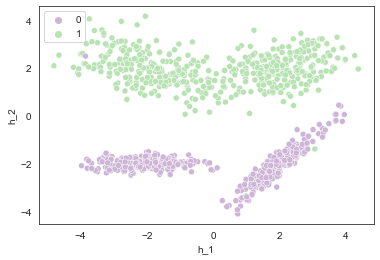

In [25]:
import sklearn.datasets as datasets
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# create a random classification dataset
hidden, labels = datasets.make_classification(n_samples=1000, n_features=2, n_informative=2,
                                              n_redundant=0, class_sep=2, random_state=0)

# convert data into a dataframe
hidden = pd.DataFrame(list(zip(list(hidden.T[0]), list(hidden.T[1]))), columns =['h_1', 'h_2'])

# plot the data with labels
sns.set_style('white')
sns.set_palette('PRGn', 2)
sns.scatterplot(data=hidden, x='h_1', y='h_2', hue=labels)
plt.show()

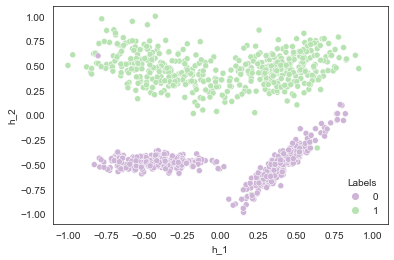

In [26]:
# normalize the data to be between -1 and 1
column_maximum = lambda x: max(x.min(), x.max(), key=abs)
normalization_constants = abs(hidden.apply(column_maximum, axis=0))
hidden = hidden / normalization_constants

# plot the normalized data distribution
sns.scatterplot(data=hidden, x='h_1', y='h_2', hue=labels)
plt.legend(title='Labels', loc=4, frameon=False)
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.savefig('figures/generated_h.png', dpi=200)
plt.show()

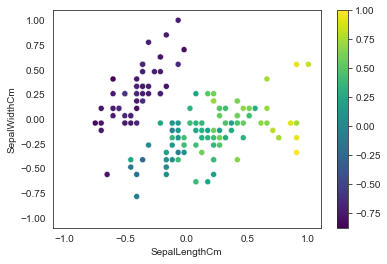

In [27]:
# import the iris dataset
iris = pd.read_csv('../testing_methods/datasets/iris.csv')
color_map = sns.color_palette('viridis', as_cmap=True)

# normalize the iris data between -1 and 1
iris = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm']]
iris = iris - iris.mean(axis=0)
normalization_constants = abs(iris.apply(column_maximum, axis=0))
iris = iris / normalization_constants

# plot the data relationship
ax = sns.scatterplot(data=iris, x='SepalLengthCm', y='SepalWidthCm', hue='PetalLengthCm', palette=color_map)

# add color bar
norm = plt.Normalize(iris['PetalLengthCm'].min(), iris['PetalLengthCm'].max())
sm = plt.cm.ScalarMappable(cmap=color_map, norm=norm)
sm.set_array([])
ax.get_legend().remove()
ax.figure.colorbar(sm)

# show plot
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.savefig('figures/iris_mapping.png', dpi=200)
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

# select columns for training and testing
h = iris[['SepalLengthCm', 'SepalWidthCm']]
x = iris['PetalLengthCm']
h_train, h_test, x_train, x_test = train_test_split(h, x, test_size=0.25, random_state=0)

# train the regressor
regressor = SVR().fit(h_train, x_train)
print('Train score:', regressor.score(h_train, x_train))
print('Test score:', regressor.score(h_test, x_test))

# create a column x_1
x_1 = regressor.predict(hidden)

Train score: 0.9489005927861187
Test score: 0.8829574007778284


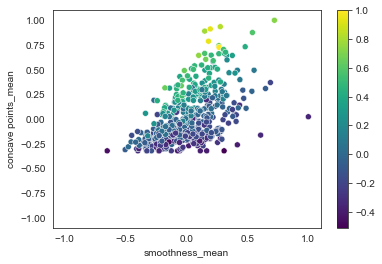

In [29]:
# import the breast cancer dataset
cancer = pd.read_csv('../testing_methods/datasets/breast_cancer.csv')

# normalize the cancer data between -1 and 1
cancer = cancer[['radius_mean', 'concave points_mean', 'smoothness_mean']]
cancer = cancer - cancer.mean(axis=0)
normalization_constants = abs(cancer.apply(column_maximum, axis=0))
cancer = cancer / normalization_constants

# plot the data relationship
ax = sns.scatterplot(data=cancer, x='smoothness_mean', y='concave points_mean', hue='radius_mean', palette=color_map)

# add color bar
norm = plt.Normalize(cancer['radius_mean'].min(), cancer['radius_mean'].max())
sm = plt.cm.ScalarMappable(cmap=color_map, norm=norm)
sm.set_array([])
ax.get_legend().remove()
ax.figure.colorbar(sm)

# show plot
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.savefig('figures/cancer_mapping.png', dpi=200)
plt.show()

In [30]:
# select columns for training and testing
h = cancer[['concave points_mean', 'smoothness_mean']]
x = cancer['radius_mean']
h_train, h_test, x_train, x_test = train_test_split(h, x, test_size=0.25, random_state=0)

# train the regressor
regressor = SVR().fit(h_train, x_train)
print('Train score:', regressor.score(h_train, x_train))
print('Test score:', regressor.score(h_test, x_test))

# create a column x_2
x_2 = regressor.predict(hidden)

Train score: 0.8231860345124697
Test score: 0.8097437998173496


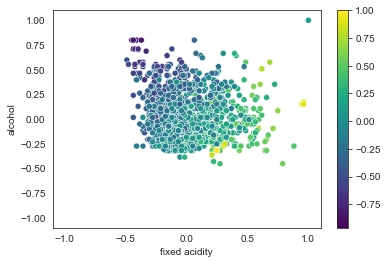

In [31]:
# import the breast cancer dataset
wine = pd.read_csv('../testing_methods/datasets/wine_quality.csv')

wine.corr()

# normalize the cancer data between -1 and 1
wine = wine[['fixed acidity', 'alcohol', 'density']]
wine = wine - wine.mean(axis=0)
normalization_constants = abs(wine.apply(column_maximum, axis=0))
wine = wine / normalization_constants

# plot the data relationship
ax = sns.scatterplot(data=wine, x='fixed acidity', y='alcohol', hue='density', palette=color_map)

# add color bar
norm = plt.Normalize(wine['density'].min(), wine['density'].max())
sm = plt.cm.ScalarMappable(cmap=color_map, norm=norm)
sm.set_array([])
ax.get_legend().remove()
ax.figure.colorbar(sm)

# show plot
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.savefig('figures/wine_mapping.png', dpi=200)
plt.show()

In [32]:
from sklearn.neighbors import KNeighborsRegressor

# select columns for training and testing
h = wine[['fixed acidity', 'alcohol']]
x = wine['density']
h_train, h_test, x_train, x_test = train_test_split(h, x, test_size=0.25, random_state=0)

# train the regressor
regressor = KNeighborsRegressor(n_neighbors=10).fit(h_train, x_train)
print('Train score:', regressor.score(h_train, x_train))
print('Test score:', regressor.score(h_test, x_test))

# create a column x_3
x_3 = regressor.predict(hidden)

Train score: 0.7132191207925809
Test score: 0.695195625870601


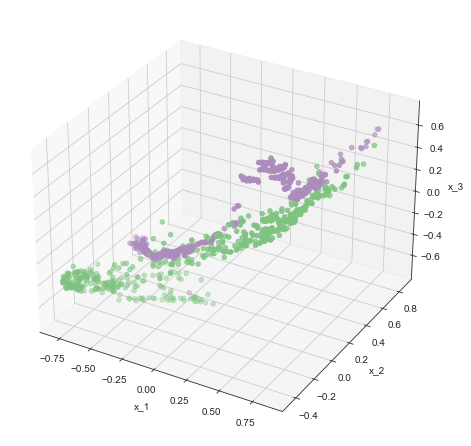

In [33]:
from pylab import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

sns.set_palette('viridis', 2)

fig = plt.figure(figsize=(7,6))
ax = Axes3D(fig)

purple_green = ListedColormap(sns.color_palette('PRGn', 3))

ax.scatter(x_1, x_2, x_3, c=labels, marker='o', cmap=purple_green)
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('x_3')

plt.savefig('figures/observations_space.png', dpi=200)
plt.show()

In [34]:
# save the produced data into a csv file
columns_data = list(zip(x_1.tolist(), x_2.tolist(), x_3.tolist(), labels.tolist()))
df = pd.DataFrame(columns_data, columns = ['x_1', 'x_2', 'x_3', 'y'])
df = pd.concat([hidden, df], axis=1)

df.to_csv('datasets/real_life_regressor.csv', index=False)

df.head()

,h_1,h_2,x_1,x_2,x_3,y
0,-0.507907,-0.426783,-0.348796,-0.156770,-0.197266,0
1,0.208406,0.579240,-0.049915,-0.135873,-0.057563,1
2,-0.408581,0.486722,-0.734377,-0.359439,-0.515557,1
3,-0.686362,0.810403,-0.127156,0.049691,-0.722663,1
4,-0.270678,0.418167,-0.747838,-0.360587,-0.447434,1
